# Vault of vaults straegy

- Set up an open-ended vault universe on Arbitrum
- Create a portfolio construction strategy which picks basket of best vaults based on the past returns
- We use handpicked `VAULTS` list to limit us to some good known vaults to reduce the scope of the backtest
- We further limit this to USDC denominated vaults only - no currency conversions

# Set up

Set up Trading Strategy data client.


In [29]:
import logging

from tradingstrategy.client import Client
from tradeexecutor.utils.notebook import setup_charting_and_output, OutputMode, set_notebook_logging

client = Client.create_jupyter_client()

# Set up drawing charts in interactive vector output mode.
# This is slower. See the alternative commented option below.
# setup_charting_and_output(OutputMode.interactive)

# Set up rendering static PNG images.
# This is much faster but disables zoom on any chart.
setup_charting_and_output(OutputMode.static, image_format="png", width=1500, height=1000)


logger = logging.getLogger("strategy")



Started Trading Strategy in Jupyter notebook environment, configuration is stored in /Users/moo/.tradingstrategy


# Chain configuration

- Choose target chains and their vults

In [30]:
from eth_defi.token import USDC_NATIVE_TOKEN
from eth_defi.token import USDT_NATIVE_TOKEN
from eth_defi.token import WRAPPED_NATIVE_TOKEN

from tradingstrategy.chain import ChainId
from tradingstrategy.lending import LendingProtocolType

CHAIN_ID = ChainId.arbitrum


# We define our main trading universe,
# and then Ethereum mainnet as a validation set
match CHAIN_ID:
    case ChainId.arbitrum:

        EXCHANGES = ("uniswap-v2", "uniswap-v3")
        SUPPORTING_PAIRS = [
            (ChainId.arbitrum, "uniswap-v3", "WETH", "USDC", 0.0005),
        ]
        LENDING_RESERVES = None
        PREFERRED_STABLECOIN = USDC_NATIVE_TOKEN[CHAIN_ID].lower()

        # See deploy script for the vault address
        VAULT_LIST = "0x959f3807f0aa7921e18c78b00b2819ba91e52fef, 0xe5a4f22fcb8893ba0831babf9a15558b5e83446f, 0x75288264fdfea8ce68e6d852696ab1ce2f3e5004, 0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a, 0x2d5fde3d24ed3e7c548a59039eee5af8200f9291, 0xb739ae19620f7ecb4fb84727f205453aa5bc1ad2, 0x9fa306b1f4a6a83fec98d8ebbabedff78c407f6b, 0xd15a07a4150b0c057912fe883f7ad22b97161591, 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9, 0x5e777587d6f9261a85d7f062790d4cee71081ba1, 0x0b2b2b2076d95dda7817e785989fe353fe955ef9, 0x6ca200319a0d4127a7a473d6891b86f34e312f42, 0x4f63cfea7458221cb3a0eee2f31f7424ad34bb58, 0x8a1ef3066553275829d1c0f64ee8d5871d5ce9d3, 0x407d3d942d0911a2fea7e22417f81e27c02d6c6f, 0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9, 0x64ca76e2525fc6ab2179300c15e343d73e42f958, 0x0df2e3a0b5997adc69f8768e495fd98a4d00f134, 0xa7781f1d982eb9000bc1733e29ff5ba2824cdbe5, 0xa53cf822fe93002aeae16d395cd823ece161a6ac, 0xa60643c90a542a95026c0f1dbdb0615ff42019cf, 0x4a8e91248e5602d0d34a5e86a9f1b60e8f2dc721, 0x4b6f1c9e5d470b97181786b26da0d0945a7cf027, 0xd3443ee1e91af28e5fb858fbd0d72a63ba8046e0, 0x36b69949d60d06eccc14de0ae63f4e00cc2cd8b9, 0xdc1ab820c92735e7a5e48f10fa3d8424ec47a93e, 0x444868b6e8079ac2c55eea115250f92c2b2c4d14, 0xbc404429558292ee2d769e57d57d6e74bbd2792d, 0x7e97fa6893871a2751b5fe961978dccb2c201e65, 0x7788a3538c5fc7f9c7c8a74eac4c898fc8d87d92, 0x5f851f67d24419982ecd7b7765defd64fbb50a97, 0x250cf7c82bac7cb6cf899b6052979d4b5ba1f9ca, 0x79f76e343807ea194789d114e61be6676e6bbeda, 0x5c0c306aaa9f877de636f4d5822ca9f2e81563ba, 0xe4783824593a50bfe9dc873204cec171ebc62de0, 0x87deae530841a9671326c9d5b9f91bdb11f3162c, 0x940098b108fb7d0a7e374f6eded7760787464609, 0xd089b4cb88dacf4e27be869a00e9f7e2e3c18193, 0xe07f1151887b8fdc6800f737252f6b91b46b5865, 0x037dff1c12805707d7c29f163e0f09fc9102657a, 0x7f6501d3b98ee91f9b9535e4b0ac710fb0f9e0bc, 0x7cfadfd5645b50be87d546f42699d863648251ad, 0x7c574174da4b2be3f705c6244b4bfa0815a8b3ed, 0x5579e27129110bbc9c0ec1388acbf7ad04771b76, 0x1c107c4233ab3056254e717c7a67f9917079b615, 0x1a996cb54bb95462040408c06122d45d6cdb6096, 0x97901cf9f064c40f538c5f7b53420a02cb68c644, 0xaa38b9475d7a9ea7a2a2bada7e41d56c5db132b8, 0x004626a008b1acdc4c74ab51644093b155e59a23, 0xd85e038593d7a098614721eae955ec2022b9b91b, 0xe6e8e7956cd8ab07bf591d4f8f478c865db621c2, 0xd3ca9bec3e681b0f578fd87f20ebcf2b7e0bb739, 0x4785df09013c1c492504fb4688ed3f320c964c9c, 0x62ddf301b21970e7cc12c34caac9ce9bc975c0a9, 0x9168ac3a83a31bd85c93f4429a84c05db2caef08, 0x747a547e48ee52491794b8ea01cd81fc5d59ad84, 0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d, 0xe2d8267d285a7ae1edf48498ff044241d04e9608, 0xa6c2e6a83d594e862cdb349396856f7ffe9a979b, 0x2d0483fefaba4325c7521539a3dfacf94a19c472, 0x3d75f2bb8abcdbd1e27443cb5cbce8a668046c81, 0x2433d6ac11193b4695d9ca73530de93c538ad18a, 0x34a2b066af16409648ef15d239e656edb8790ca0, 0x9045ae36f963b7184861bdce205ea8b08913b48c, 0xd27c24fb9c8ee7cd9de1415b8086a4072016fc9d, 0x2ba39e5388ac6c702cb29aea78d52aa66832f1ee, 0xa91267a25939b2b0f046013fbf9597008f7f014b, 0xd5255cc08ebaf6d54ac9448822a18d8a3da29a42, 0x2514a2ce842705ead703d02fabfd8250bfcfb8bd, 0x49014a8eb1585cbee6a7a9a50c3b81017bf6cc4d, 0xa5944beaed63153c916bff9b407246b6c87ebf99, 0x74e6afef5705beb126c6d3bf46f8fad8f3e07825, 0x0f1331014273fd693e30692b2fb451d53dec7f7c, 0x806e8538fc05774ea83d9428f778e423f6492475, 0xe82d060687c014b280b65df24acd94a77251c784, 0xeeaf2ccb73a01deb38eca2947d963d64cfde6a32, 0xf0543d476e7906374863091034fe679a7be8ee20, 0xac69cfe6bb269cebf8ab4764d7e678c3658b99f2, 0xd46993f25d298ebbcd31e941156c66f7e628a52a, 0x6a1fc0e1c60ba6564cde4910a425f1f1a1d18c1f, 0x20d419a8e12c45f88fda7c5760bb6923cee27f98, 0x3a87cf9af4d21778dad1ce7d0bf053f4b8f2631f"

        VAULTS = [
            (ChainId.arbitrum, v.strip()) for v in VAULT_LIST.split(",")
        ]        

        BENCHMARK_PAIRS = [
            (ChainId.arbitrum, "uniswap-v3", "WETH", "USDC", 0.0005),
        ]

        # Exclude Euro vaults, etc.
        # ALLOWED_VAULT_DENOMINATION_TOKENS = {"USDC", "USDT", "USDC.e"}
        ALLOWED_VAULT_DENOMINATION_TOKENS = {"USDC"}
    
    case ChainId.base:
        raise NotImplementedError()
    case ChainId.ethereum:
        raise NotImplementedError()
    case ChainId.binance:
        raise NotImplementedError()
    case ChainId.avalanche:
        raise NotImplementedError()
    case _:
        raise NotImplementedError(f"Chain not supported: {CHAIN_ID}")

# Parameters

- Collection of parameters used in the calculations

In [31]:
import datetime

import pandas as pd


from tradingstrategy.timebucket import TimeBucket
from tradeexecutor.strategy.cycle import CycleDuration
from tradeexecutor.strategy.parameters import StrategyParameters
from tradeexecutor.strategy.default_routing_options import TradeRouting

from tradeexecutor.utils.jupyter_notebook_name import get_notebook_id


class Parameters:

    id = get_notebook_id(globals())

    # We trade 1h candle
    candle_time_bucket = TimeBucket.d1
    cycle_duration = CycleDuration.cycle_7d
    
    chain_id = CHAIN_ID
    exchanges = EXCHANGES
    
    #
    # Basket size, risk and balancing parametrs.
    #   
    min_asset_universe = 5  # How many assets we need in the asset universe to start running the index
    max_assets_in_portfolio = 7  # How many assets our basket can hold once
    allocation = 0.95  # Allocate all cash to volatile pairs
    # min_rebalance_trade_threshold_pct = 0.05  # % of portfolio composition must change before triggering rebalacne
    individual_rebalance_min_threshold_usd = 500.0  # Don't make buys less than this amount
    sell_rebalance_min_threshold = 100.0
    sell_threshold = 0.05  # Sell if asset is more than 5% of the portfolio
    per_position_cap_of_pool = 0.0050  # Never own more than % of the lit liquidity of the trading pool
    max_concentration = 0.25 # How large % can one asset be in a portfolio once
    min_portfolio_weight = 0.0050  # Close position / do not open if weight is less than 50 BPS

    rolling_returns_bars = 60  # Needed to calculate weights

    min_tvl = 50_000  # Minimum TVL in the vault before it can be considered investable

    #     
    #
    # Backtesting only
    # Limiting factor: Aave v3 on Base starts at the end of DEC 2023
    #
    backtest_start = datetime.datetime(2024, 1, 1)
    backtest_end = datetime.datetime(2025, 11, 15)
    initial_cash = 100_000

    #
    # Live only
    #
    routing = TradeRouting.default
    required_history_period = datetime.timedelta(days=365*3)
    slippage_tolerance = 0.0060  # 0.6% 
    assummed_liquidity_when_data_missings = 10_000
    

parameters = StrategyParameters.from_class(Parameters)  # Convert to AttributedDict to easier typing with dot notation

# Trading pairs and market data

- This creates the strategy universe containing pair metadata and their prices
- The universe is "masked" by simply selecting pairs on the predefined pairs list

In [32]:

from pathlib import Path
from typing import Callable
from tradingstrategy.pair import PandasPairUniverse


from eth_defi.vault.vaultdb import DEFAULT_RAW_PRICE_DATABASE

from tradingstrategy.utils.token_filter import add_base_quote_address_columns
from tradingstrategy.utils.token_filter import filter_for_exchange_slugs
from tradingstrategy.utils.token_filter import filter_pairs_default
from tradingstrategy.utils.token_filter import filter_for_selected_pairs
from tradingstrategy.utils.token_extra_data import load_token_metadata
from tradingstrategy.utils.token_filter import deduplicate_pairs_by_volume
from tradingstrategy.utils.token_extra_data import load_token_metadata
from tradingstrategy.alternative_data.vault import load_vault_database


from tradeexecutor.strategy.trading_strategy_universe import TradingStrategyUniverse
from tradeexecutor.strategy.execution_context import ExecutionContext, notebook_execution_context
from tradeexecutor.strategy.universe_model import UniverseOptions
from tradeexecutor.strategy.trading_strategy_universe import TradingStrategyUniverse, load_partial_data
from tradeexecutor.strategy.execution_context import ExecutionContext, notebook_execution_context
from tradeexecutor.strategy.universe_model import UniverseOptions
from tradeexecutor.analysis.pair import display_strategy_universe
from tradeexecutor.strategy.pandas_trader.trading_universe_input import CreateTradingUniverseInput
from tradeexecutor.analysis.vault import display_vaults



# Hack to support vault data exposure to live trading universe creation
from dotenv import load_dotenv
load_dotenv(override=True)  # Loads variables from .env file


def create_trading_universe(
    input: CreateTradingUniverseInput,
) -> TradingStrategyUniverse:
    """Create the trading universe.

    - Load Trading Strategy full pairs dataset

    - Load built-in Coingecko top 1000 dataset

    - Get all DEX tokens for a certain Coigecko category

    - Load OHCLV data for these pairs

    - Load also BTC and ETH price data to be used as a benchmark
    """

    execution_context = input.execution_context
    client = input.client
    timestamp = input.timestamp
    parameters = input.parameters or Parameters  # Some CLI commands do not support yet passing this
    universe_options = input.universe_options

    if execution_context.live_trading:
        # Live trading, send strategy universe formation details
        # to logs
        debug_printer = logger.info
    else:
        # Jupyter notebook inline output
        debug_printer = print

    chain_id = parameters.chain_id

    debug_printer(f"Preparing trading universe on chain {chain_id.get_name()}")

    # Pull out our benchmark pairs ids.
    # We need to construct pair universe object for the symbolic lookup.
    # TODO: PandasPairUniverse(buidl_index=True) - speed this up by skipping index building
    all_pairs_df = client.fetch_pair_universe().to_pandas()
    pairs_df= filter_for_selected_pairs(
        all_pairs_df,
        SUPPORTING_PAIRS,
    )    

    debug_printer(f"We have total {len(all_pairs_df)} pairs in dataset and going to use {len(pairs_df)} pairs for the strategy")

    # Check which vaults we can include based on allowed deposit tokens for this backtest
    vault_universe = load_vault_database()
    total_vaults = vault_universe.get_vault_count()
    vault_universe = vault_universe.limit_to_vaults(VAULTS, check_all_vaults_found=False)
    vault_universe = vault_universe.limit_to_denomination(ALLOWED_VAULT_DENOMINATION_TOKENS)
    debug_printer(f"Loaded total {vault_universe.get_vault_count()} vaults from the total of {total_vaults} in vault database")

    # Default vault data bundle path for backtesting
    vault_bundled_price_data = DEFAULT_RAW_PRICE_DATABASE
    debug_printer(f"Using vault price data for backtesting from {vault_bundled_price_data}")

    dataset = load_partial_data(
        client=client,
        time_bucket=parameters.candle_time_bucket,
        pairs=pairs_df,
        execution_context=execution_context,
        universe_options=universe_options,
        liquidity=True,
        liquidity_time_bucket=TimeBucket.d1,
        lending_reserves=LENDING_RESERVES,
        vaults=vault_universe,
        vault_bundled_price_data=vault_bundled_price_data,
        check_all_vaults_found=True,
    )

    debug_printer("Creating strategy universe with price feeds and vaults")
    strategy_universe = TradingStrategyUniverse.create_from_dataset(
        dataset,
        reserve_asset=PREFERRED_STABLECOIN,
        forward_fill=True,  # We got very gappy data from low liquid DEX coins
        forward_fill_until=timestamp,
    )

    # Dump our vault data and check for data errors
    display_vaults(
        vault_universe,
        strategy_universe,
        execution_mode=execution_context.mode,
        printer=debug_printer,  
    )

    return strategy_universe


universe_input = CreateTradingUniverseInput(
    execution_context=notebook_execution_context,
    client=client,
    timestamp=None,
    parameters=parameters,
    universe_options=UniverseOptions.from_strategy_parameters_class(Parameters, notebook_execution_context),
    execution_model=None,
)

strategy_universe = create_trading_universe(universe_input)


print("Universe creation done")

df = display_strategy_universe(
    strategy_universe, 
    sort_key="base",
    sort_numeric=False,
    limit=75,
    show_token_risk=True,
    show_tokensniffer=True,
)

df = df.head(10)

from IPython.display import display, HTML
html_table = df.to_html(escape=False, classes='table table-striped')
display(HTML(html_table))


Preparing trading universe on chain Arbitrum One
We have total 386603 pairs in dataset and going to use 1 pairs for the strategy
Loaded total 55 vaults from the total of 19073 in vault database
Using vault price data for backtesting from /Users/moo/.tradingstrategy/vaults/cleaned-vault-prices-1h.parquet


Loading TVL/liquidity data for 1 pairs:   0%|          | 0/1 [00:00<?, ?it/s]

Creating strategy universe with price feeds and vaults


/Users/moo/code/trade-executor/deps/trading-strategy/tradingstrategy/utils/wrangle.py:250: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Vault check list


Chain                                       Vault  \
0   Arbitrum  0x9045ae36f963b7184861bdce205ea8b08913b48c   
1   Arbitrum  0xd3443ee1e91af28e5fb858fbd0d72a63ba8046e0   
2   Arbitrum  0x959f3807f0aa7921e18c78b00b2819ba91e52fef   
3   Arbitrum  0x7cfadfd5645b50be87d546f42699d863648251ad   
4   Arbitrum  0x5f851f67d24419982ecd7b7765defd64fbb50a97   
5   Arbitrum  0xd27c24fb9c8ee7cd9de1415b8086a4072016fc9d   
6   Arbitrum  0x97901cf9f064c40f538c5f7b53420a02cb68c644   
7   Arbitrum  0x1c107c4233ab3056254e717c7a67f9917079b615   
8   Arbitrum  0x1a996cb54bb95462040408c06122d45d6cdb6096   
9   Arbitrum  0x20d419a8e12c45f88fda7c5760bb6923cee27f98   
10  Arbitrum  0x74e6afef5705beb126c6d3bf46f8fad8f3e07825   
11  Arbitrum  0xa91267a25939b2b0f046013fbf9597008f7f014b   
12  Arbitrum  0xa5944beaed63153c916bff9b407246b6c87ebf99   
13  Arbitrum  0x75288264fdfea8ce68e6d852696ab1ce2f3e5004   
14  Arbitrum  0x444868b6e8079ac2c55eea115250f92c2b2c4d14   
15  Arbitrum  0xaa38b9475d7a9ea7a2a2bada7e41d56c5db132b8   
16  Arbitrum  0x0df2e3a0b5997adc69f8768e495fd98a4d00f134   
17  Arbitrum  0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a   
18  Arbitrum  0xe5a4f22fcb8893ba0831babf9a15558b5e83446f   
19  Arbitrum  0x7f6501d3b98ee91f9b9535e4b0ac710fb0f9e0bc   
20  Arbitrum  0x3a87cf9af4d21778dad1ce7d0bf053f4b8f2631f   
21  Arbitrum  0x940098b108fb7d0a7e374f6eded7760787464609   
22  Arbitrum  0xd5255cc08ebaf6d54ac9448822a18d8a3da29a42   
23  Arbitrum  0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9   
24  Arbitrum  0x79f76e343807ea194789d114e61be6676e6bbeda   
25  Arbitrum  0x2ba39e5388ac6c702cb29aea78d52aa66832f1ee   
26  Arbitrum  0x6ca200319a0d4127a7a473d6891b86f34e312f42   
27  Arbitrum  0x2433d6ac11193b4695d9ca73530de93c538ad18a   
28  Arbitrum  0x250cf7c82bac7cb6cf899b6052979d4b5ba1f9ca   
29  Arbitrum  0x7c574174da4b2be3f705c6244b4bfa0815a8b3ed   
30  Arbitrum  0x7e97fa6893871a2751b5fe961978dccb2c201e65   
31  Arbitrum  0x4f63cfea7458221cb3a0eee2f31f7424ad34bb58   
32  Arbitrum  0x3d75f2bb8abcdbd1e27443cb5cbce8a668046c81   
33  Arbitrum  0xa60643c90a542a95026c0f1dbdb0615ff42019cf   
34  Arbitrum  0x87deae530841a9671326c9d5b9f91bdb11f3162c   
35  Arbitrum  0x2d5fde3d24ed3e7c548a59039eee5af8200f9291   
36  Arbitrum  0x2514a2ce842705ead703d02fabfd8250bfcfb8bd   
37  Arbitrum  0x5c0c306aaa9f877de636f4d5822ca9f2e81563ba   
38  Arbitrum  0xe6e8e7956cd8ab07bf591d4f8f478c865db621c2   
39  Arbitrum  0x62ddf301b21970e7cc12c34caac9ce9bc975c0a9   
40  Arbitrum  0x4785df09013c1c492504fb4688ed3f320c964c9c   
41  Arbitrum  0xe2d8267d285a7ae1edf48498ff044241d04e9608   
42  Arbitrum  0xd15a07a4150b0c057912fe883f7ad22b97161591   
43  Arbitrum  0xdc1ab820c92735e7a5e48f10fa3d8424ec47a93e   
44  Arbitrum  0xe4783824593a50bfe9dc873204cec171ebc62de0   
45  Arbitrum  0xa53cf822fe93002aeae16d395cd823ece161a6ac   
46  Arbitrum  0x407d3d942d0911a2fea7e22417f81e27c02d6c6f   
47  Arbitrum  0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9   
48  Arbitrum  0xac69cfe6bb269cebf8ab4764d7e678c3658b99f2   
49  Arbitrum  0x4a8e91248e5602d0d34a5e86a9f1b60e8f2dc721   
50  Arbitrum  0x5e777587d6f9261a85d7f062790d4cee71081ba1   
51  Arbitrum  0x36b69949d60d06eccc14de0ae63f4e00cc2cd8b9   
52  Arbitrum  0x4b6f1c9e5d470b97181786b26da0d0945a7cf027   
53  Arbitrum  0x5579e27129110bbc9c0ec1388acbf7ad04771b76   
54  Arbitrum  0x64ca76e2525fc6ab2179300c15e343d73e42f958   

                                    Name                       Protocol  \
0                          VodkaV2-WATER  <protocol-not-yet-identified>   
1            gTrade (Gains Network USDC)                  gains-network   
2                                 gmUSDC                          umami   
3             Static Aave Arbitrum USDCn                      superform   
4                                 gmUSDC                          umami   
5                       Karak - USD Coin  <protocol-not-yet-identified>   
6       Crypto.com Defi Wallet AAVE USDC                 kiln-metavault   
7   Crypto.com Defi Wallet Compound USDC      

Universe creation done
Results limited to first 75 entries


### Asset to trading pair map

- Build a helper map
- Because we are operating on trading pairs, not on tokens, which are the base asset of a trading pair, we set up 
  this map to easily look up the selected trading pair by its symbol

In [33]:
from tradingstrategy.types import TokenSymbol
from tradeexecutor.state.identifier import TradingPairIdentifier

# Create base token symbol to pair map to help later
# Token
token_map: dict[TokenSymbol, TradingPairIdentifier] = {p.base.token_symbol: p for p in strategy_universe.iterate_pairs()}

# Tokens part of benchmark data, but not the strategy
benchmark_pair_ids = [p.internal_id for p in strategy_universe.iterate_pairs() if p.other_data.get("benchmark") is True]
category_pair_ids = [p.internal_id for p in strategy_universe.iterate_pairs() if p.other_data.get("benchmark") is not True]

print(f"Token map is {len(token_map)} assets")
print("Category trading pairs", len(category_pair_ids))
print("Benchmark trading pairs", len(benchmark_pair_ids))

Token map is 51 assets
Category trading pairs 56
Benchmark trading pairs 0


# Indicators

- Precalculate indicators used by the strategy

In [34]:
import pandas as pd
from IPython.display import HTML
import pandas_ta

from tradeexecutor.strategy.pandas_trader.indicator import IndicatorSource
from tradeexecutor.strategy.trading_strategy_universe import TradingStrategyUniverse
from tradeexecutor.strategy.pandas_trader.indicator import calculate_and_load_indicators_inline
from tradeexecutor.strategy.pandas_trader.indicator import IndicatorDependencyResolver
from tradeexecutor.state.types import USDollarAmount
from tradeexecutor.strategy.pandas_trader.indicator_decorator import IndicatorRegistry
from tradeexecutor.analysis.indicator import display_indicators
from tradingstrategy.utils.groupeduniverse import resample_candles


indicators = IndicatorRegistry()

empty_series = pd.Series([], index=pd.DatetimeIndex([]))


@indicators.define()
def rolling_returns(
    close: pd.Series,
    rolling_returns_bars: int = 60,
) -> pd.Series:
    """Calculate rolling returns over a period"
    """

    windowed = close.rolling(
        window=rolling_returns_bars, 
        min_periods=2,
    ).max()
    series = (close / windowed)
    return series


@indicators.define(source=IndicatorSource.tvl)
def tvl(
    close: pd.Series,
    execution_context: ExecutionContext,
    timestamp: pd.Timestamp,
) -> pd.Series:
    """Get TVL series for a pair.

    - Because TVL data is 1d and we use 1h everywhere else, we need to forward fill

    - Use previous hourly close as the value
    """
    if execution_context.live_trading:
        # TVL is daily data.
        # We need to forward fill until the current hour.
        # Use our special ff function.        
        assert isinstance(timestamp, pd.Timestamp), f"Live trading needs forward-fill end time, we got {timestamp}"
        from tradingstrategy.utils.forward_fill import forward_fill
        df = pd.DataFrame({"close": close})
        df_ff = forward_fill(
            df,
            Parameters.candle_time_bucket.to_frequency(),
            columns=("close",),
            forward_fill_until=timestamp,
        )
        series = df_ff["close"]
        return series
    else:
        return close.resample("1h").ffill()


@indicators.define(dependencies=(tvl,), source=IndicatorSource.dependencies_only_universe)
def tvl_inclusion_criteria(   
    min_tvl: USDollarAmount,
    dependency_resolver: IndicatorDependencyResolver,
) -> pd.Series:
    """The pair must have min XX,XXX USD one-sided TVL to be included.

    - If the Uniswap pool does not have enough ETH or USDC deposited, skip the pair as a scam

    :return:
        Series where each timestamp is a list of pair ids meeting the criteria at that timestamp
    """
    
    series = dependency_resolver.get_indicator_data_pairs_combined(tvl)
    mask = series >= min_tvl
    # Turn to a series of lists
    mask_true_values_only = mask[mask == True]
    series = mask_true_values_only.groupby(level='timestamp').apply(lambda x: x.index.get_level_values('pair_id').tolist())
    return series



@indicators.define(
    source=IndicatorSource.strategy_universe
)
def trading_availability_criteria(
    strategy_universe: TradingStrategyUniverse,
) -> pd.Series:
    """Is pair tradeable at each hour.

    - The pair has a price candle at that
    - Mitigates very corner case issues that TVL/liquidity data is per-day whileas price data is natively per 1h
      and the strategy inclusion criteria may include pair too early hour based on TVL only,
      leading to a failed attempt to rebalance in a backtest
    - Only relevant for backtesting issues if we make an unlucky trade on the starting date
      of trading pair listing

    :return:
        Series with with index (timestamp) and values (list of pair ids trading at that hour)
    """
    # Trading pair availability is defined if there is a open candle in the index for it.
    # Because candle data is forward filled, we should not have any gaps in the index.
    candle_series = strategy_universe.data_universe.candles.df["open"]
    pairs_per_timestamp = candle_series.groupby(level='timestamp').apply(lambda x: x.index.get_level_values('pair_id').tolist())
    return pairs_per_timestamp


@indicators.define(
    dependencies=[
        tvl_inclusion_criteria,
        trading_availability_criteria
    ],
    source=IndicatorSource.strategy_universe
)
def inclusion_criteria(
    strategy_universe: TradingStrategyUniverse,
    min_tvl: USDollarAmount,
    dependency_resolver: IndicatorDependencyResolver
) -> pd.Series:
    """Pairs meeting all of our inclusion criteria.

    - Give the tradeable pair set for each timestamp

    :return:
        Series where index is timestamp and each cell is a list of pair ids matching our inclusion criteria at that moment
    """

    # Filter out benchmark pairs like WETH in the tradeable pair set
    benchmark_pair_ids = set(strategy_universe.get_pair_by_human_description(desc).internal_id for desc in SUPPORTING_PAIRS)

    tvl_series = dependency_resolver.get_indicator_data(
        tvl_inclusion_criteria,
        parameters={
            "min_tvl": min_tvl,
        },
    )

    trading_availability_series = dependency_resolver.get_indicator_data(trading_availability_criteria)

    #
    # Process all pair ids as a set and the final inclusion
    # criteria is union of all sub-criterias
    #

    df = pd.DataFrame({
        "tvl_pair_ids": tvl_series,
        "trading_availability_pair_ids": trading_availability_series,
    })

    # https://stackoverflow.com/questions/33199193/how-to-fill-dataframe-nan-values-with-empty-list-in-pandas
    df = df.fillna("").apply(list)

    def _combine_criteria(row):
        final_set = set(row["tvl_pair_ids"]) & \
                    set(row["trading_availability_pair_ids"])
        return final_set - benchmark_pair_ids

    union_criteria = df.apply(_combine_criteria, axis=1)

    # Inclusion criteria data can be spotty at the beginning when there is only 0 or 1 pairs trading,
    # so we need to fill gaps to 0
    full_index = pd.date_range(
        start=union_criteria.index.min(),
        end=union_criteria.index.max(),
        freq=Parameters.candle_time_bucket.to_frequency(),
    )
    reindexed = union_criteria.reindex(full_index, fill_value=[])
    return reindexed


@indicators.define(dependencies=(tvl_inclusion_criteria,), source=IndicatorSource.dependencies_only_universe)
def tvl_included_pair_count(
        min_tvl: USDollarAmount,
        dependency_resolver: IndicatorDependencyResolver
) -> pd.Series:
    """Calculate number of pairs in meeting volatility criteria on each timestamp"""
    series = dependency_resolver.get_indicator_data(
        tvl_inclusion_criteria,
        parameters={"min_tvl": min_tvl},
    )
    series = series.apply(len)

    # TVL data can be spotty at the beginning when there is only 0 or 1 pairs trading,
    # so we need to fill gaps to 0
    full_index = pd.date_range(
        start=series.index.min(),
        end=series.index.max(),
        freq=Parameters.candle_time_bucket.to_frequency(),
    )
    # Reindex and fill NaN with zeros
    reindexed = series.reindex(full_index, fill_value=0)
    return reindexed


@indicators.define(dependencies=(inclusion_criteria,), source=IndicatorSource.dependencies_only_universe)
def all_criteria_included_pair_count(
    min_tvl: USDollarAmount,
    dependency_resolver: IndicatorDependencyResolver
) -> pd.Series:
    """Series where each timestamp is the list of pairs meeting all inclusion criteria.

    :return:
        Series with pair count for each timestamp
    """
    series = dependency_resolver.get_indicator_data(
        "inclusion_criteria",
        parameters={
            "min_tvl": min_tvl, 
        },
    )
    return series.apply(len)


@indicators.define(source=IndicatorSource.strategy_universe)
def trading_pair_count(
    strategy_universe: TradingStrategyUniverse,
) -> pd.Series:
    """Get number of pairs that trade at each timestamp.

    - Pair must have had at least one candle before the timestamp to be included

    - Exclude benchmarks pairs we do not trade

    :return:
        Series with pair count for each timestamp
    """

    benchmark_pair_ids = {strategy_universe.get_pair_by_human_description(desc).internal_id for desc in SUPPORTING_PAIRS}

    # Get pair_id, timestamp -> timestamp, pair_id index
    series = strategy_universe.data_universe.candles.df["open"]    
    swap_index = series.index.swaplevel(0, 1)

    seen_pairs = set()
    seen_data = {}

    for timestamp, pair_id in swap_index:
        if pair_id in benchmark_pair_ids:
            continue
        seen_pairs.add(pair_id)
        seen_data [timestamp] = len(seen_pairs)

    series = pd.Series(seen_data.values(), index=list(seen_data.keys()))
    return series



@indicators.define(
    source=IndicatorSource.dependencies_only_per_pair,
    dependencies=[
        rolling_returns, 
    ]
)
def signal(
    rolling_returns_bars: int,
    candle_time_bucket: TimeBucket,
    pair: TradingPairIdentifier,
    dependency_resolver: IndicatorDependencyResolver    
) -> pd.Series:
    """Calculate weighting criteria ("signal") as the past returns of the rolling returns window.
    """

    rolling_returns = dependency_resolver.get_indicator_data(
            "rolling_returns",
        parameters={
            "rolling_returns_bars": rolling_returns_bars,            
        },
        pair=pair,
    )
    return rolling_returns


display_indicators(indicators)


# Calculate all indicators where parameters have changed and store the result on disk
indicator_data = calculate_and_load_indicators_inline(
    strategy_universe=strategy_universe,
    create_indicators=indicators.create_indicators,
    parameters=parameters,
)


We have 9 indicators:


Reading cached indicators rolling_returns, tvl, tvl_inclusion_criteria, trading_availability_criteria, inclusi…

Using indicator cache /Users/moo/.cache/indicators/arbitrum_1d_56_2023-09-21-2025-11-26_ff


# Charts

- Define charts used in backtesting and live execution



In [35]:
from plotly.graph_objects import Figure
from tradeexecutor.strategy.chart.definition import ChartRegistry, ChartKind, ChartInput
from tradeexecutor.strategy.chart.renderer import ChartBacktestRenderingSetup
from tradeexecutor.strategy.chart.standard.trading_universe import available_trading_pairs
from tradeexecutor.strategy.chart.standard.trading_universe import inclusion_criteria_check 
from tradeexecutor.strategy.chart.standard.volatility import volatility_benchmark
from tradeexecutor.strategy.chart.standard.signal import signal_comparison
from tradeexecutor.strategy.chart.standard.signal import price_vs_signal
from tradeexecutor.strategy.chart.standard.vault import all_vaults_share_price_and_tvl
from tradeexecutor.strategy.chart.standard.vault import vault_position_timeline
from tradeexecutor.strategy.chart.standard.vault import all_vault_positions
from tradeexecutor.strategy.chart.standard.equity_curve import equity_curve
from tradeexecutor.strategy.chart.standard.equity_curve import equity_curve_with_drawdown
from tradeexecutor.strategy.chart.standard.performance_metrics import performance_metrics
from tradeexecutor.strategy.chart.standard.weight import volatile_weights_by_percent
from tradeexecutor.strategy.chart.standard.weight import volatile_and_non_volatile_percent
from tradeexecutor.strategy.chart.standard.weight import equity_curve_by_asset
from tradeexecutor.strategy.chart.standard.weight import weight_allocation_statistics
from tradeexecutor.strategy.chart.standard.position import positions_at_end
from tradeexecutor.strategy.chart.standard.thinking import last_messages
from tradeexecutor.strategy.chart.standard.alpha_model import alpha_model_diagnostics
from tradeexecutor.strategy.chart.standard.profit_breakdown import trading_pair_breakdown
from tradeexecutor.strategy.chart.standard.trading_metrics import trading_metrics
from tradeexecutor.strategy.chart.standard.interest import lending_pool_interest_accrued
from tradeexecutor.strategy.chart.standard.interest import vault_statistics
from tradeexecutor.strategy.chart.standard.single_pair import trading_pair_positions
from tradeexecutor.strategy.chart.standard.single_pair import trading_pair_price_and_trades
from tradeexecutor.strategy.chart.standard.vault import all_vaults_share_price_and_tvl as _all_vaults_share_price_and_tvl


def equity_curve_with_benchmark(input: ChartInput) -> list[Figure]:
    """Add our benchmark token"""
    return equity_curve(
        input,
        benchmark_token_symbols=["ETH"],
    )


def all_vaults_share_price_and_tvl(input: ChartInput) -> list[Figure]:
    """Limit max_count"""
    return _all_vaults_share_price_and_tvl(
        input,
        max_count=2,
    )

# Define charts we use in backtesting and live trading
charts = ChartRegistry(default_benchmark_pairs=BENCHMARK_PAIRS)
charts.register(available_trading_pairs, ChartKind.indicator_all_pairs)
charts.register(inclusion_criteria_check, ChartKind.indicator_all_pairs)
charts.register(volatility_benchmark, ChartKind.indicator_multi_pair)
charts.register(signal_comparison, ChartKind.indicator_multi_pair)
charts.register(price_vs_signal, ChartKind.indicator_multi_pair)
charts.register(all_vaults_share_price_and_tvl, ChartKind.indicator_all_pairs)
charts.register(equity_curve_with_benchmark, ChartKind.state_all_pairs)
charts.register(equity_curve_with_drawdown, ChartKind.state_all_pairs)
charts.register(performance_metrics, ChartKind.state_all_pairs)
charts.register(volatile_weights_by_percent, ChartKind.state_all_pairs)
charts.register(volatile_and_non_volatile_percent, ChartKind.state_all_pairs)
charts.register(equity_curve_by_asset, ChartKind.state_all_pairs)
charts.register(weight_allocation_statistics, ChartKind.state_all_pairs)
charts.register(positions_at_end, ChartKind.state_all_pairs)
charts.register(last_messages, ChartKind.state_all_pairs)
charts.register(alpha_model_diagnostics, ChartKind.state_all_pairs)
charts.register(trading_pair_breakdown, ChartKind.state_all_pairs)
charts.register(trading_metrics, ChartKind.state_all_pairs)
charts.register(lending_pool_interest_accrued, ChartKind.state_all_pairs)
charts.register(vault_statistics, ChartKind.state_all_pairs)
charts.register(vault_position_timeline, ChartKind.state_single_vault_pair)
charts.register(all_vault_positions, ChartKind.state_single_vault_pair)
charts.register(trading_pair_positions, ChartKind.state_single_vault_pair)
charts.register(trading_pair_price_and_trades, ChartKind.state_single_vault_pair)
charts.register(inclusion_criteria_check, ChartKind.indicator_all_pairs)

# Chart rendering pre-backtest execution
chart_renderer = ChartBacktestRenderingSetup(
    registry=charts,
    strategy_input_indicators=indicator_data,
    backtest_end_at=Parameters.backtest_end,
)


# Chart rendering pre-backtest execution
chart_renderer = ChartBacktestRenderingSetup(
    registry=charts,
    strategy_input_indicators=indicator_data,
    backtest_end_at=Parameters.backtest_end,
)

# Available pairs

- Number of pairs available to trade every month


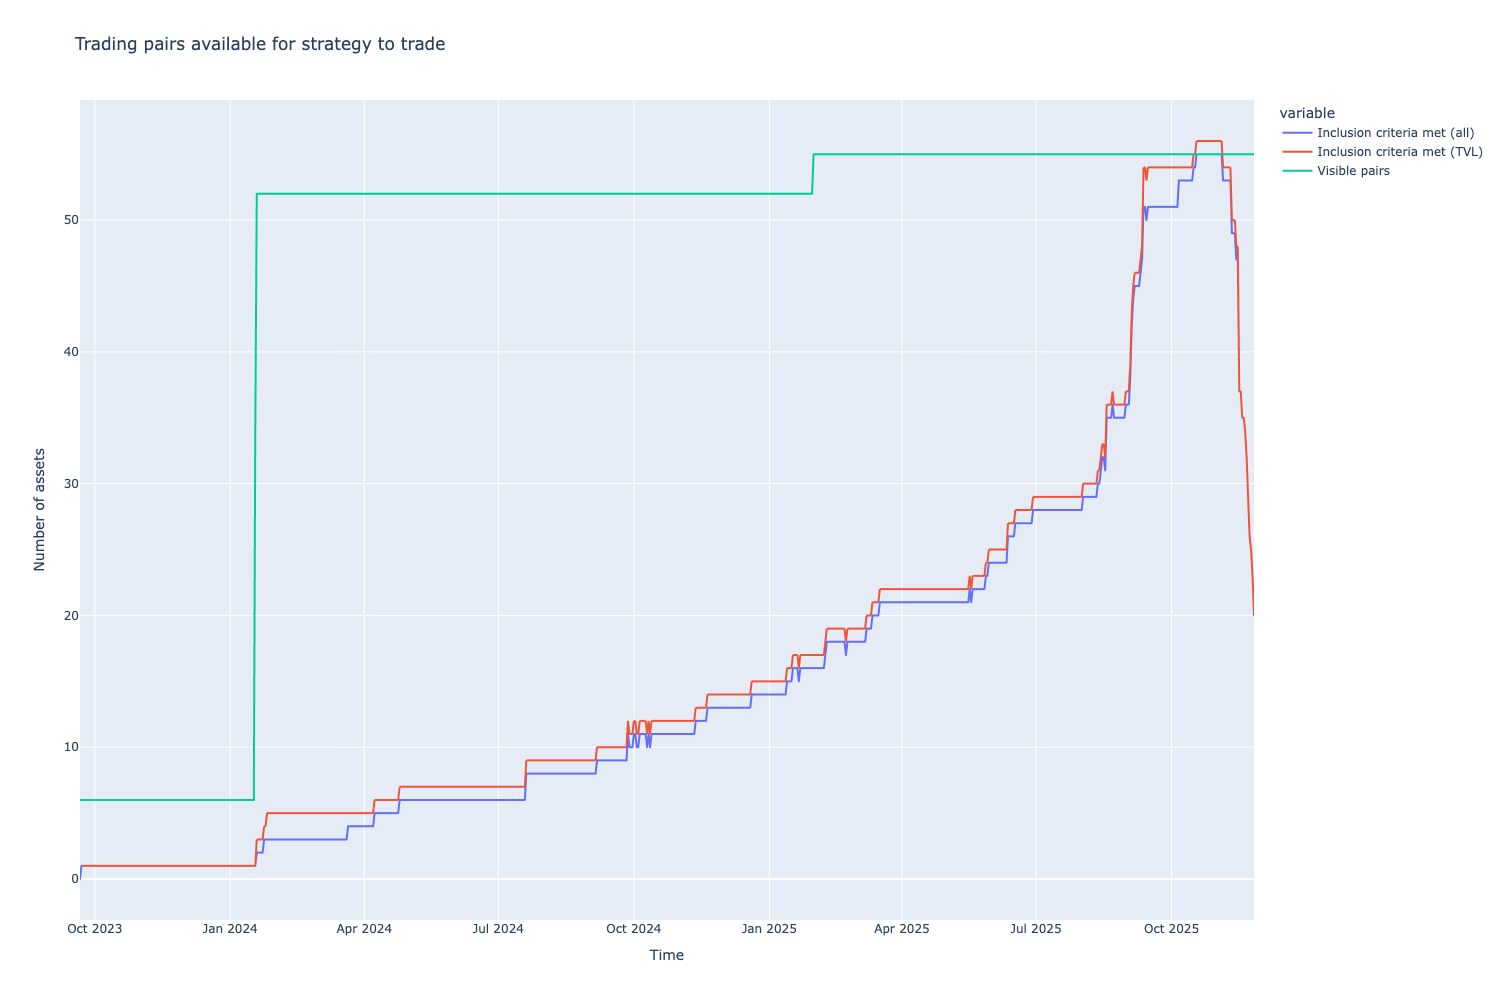

Inclusion criteria met (all)  Inclusion criteria met (TVL)  \
2025-11-22                            29                          29.0   
2025-11-23                            26                          26.0   
2025-11-24                            25                          25.0   
2025-11-25                            23                          23.0   
2025-11-26                            20                          20.0   

            Visible pairs  
2025-11-22             55  
2025-11-23             55  
2025-11-24             55  
2025-11-25             55  
2025-11-26             55

In [36]:
fig, df = chart_renderer.render(available_trading_pairs, with_dataframe=True)
fig.show()
display(df.tail(5))

## Inclusion criteria checks

- Examine when different pairs got included and what was the pair status during the inclusion

In [37]:

df = chart_renderer.render(inclusion_criteria_check)

print(f"First appearances of {len(df)} trading pairs, when they meet all inclusion criteria:")

with pd.option_context("display.float_format", "{:,.2f}".format):
    display(df.head(5))


First appearances of 55 trading pairs, when they meet all inclusion criteria:


Included at        Ticker                            DEX  \
269726860  2023-09-22  S-WATER-USDC  <protocol-not-yet-identified>   
283455471  2024-01-19   gmUSDC-USDC                          umami   
276842208  2024-01-24    gUSDC-USDC                  gains-network   
280300183  2024-03-21   gmUSDC-USDC                          umami   
269941917  2024-04-08    KUSDC-USDC  <protocol-not-yet-identified>   

           TVL at inclusion    TVL at end  
269726860        278,443.21     62,048.08  
283455471         74,834.43    284,515.79  
276842208        231,998.38 14,933,994.13  
280300183            499.15    258,528.63  
269941917        105,106.05    296,647.84

# Vault TVL and share price data

- Examine returns of the vaults used in this backtest

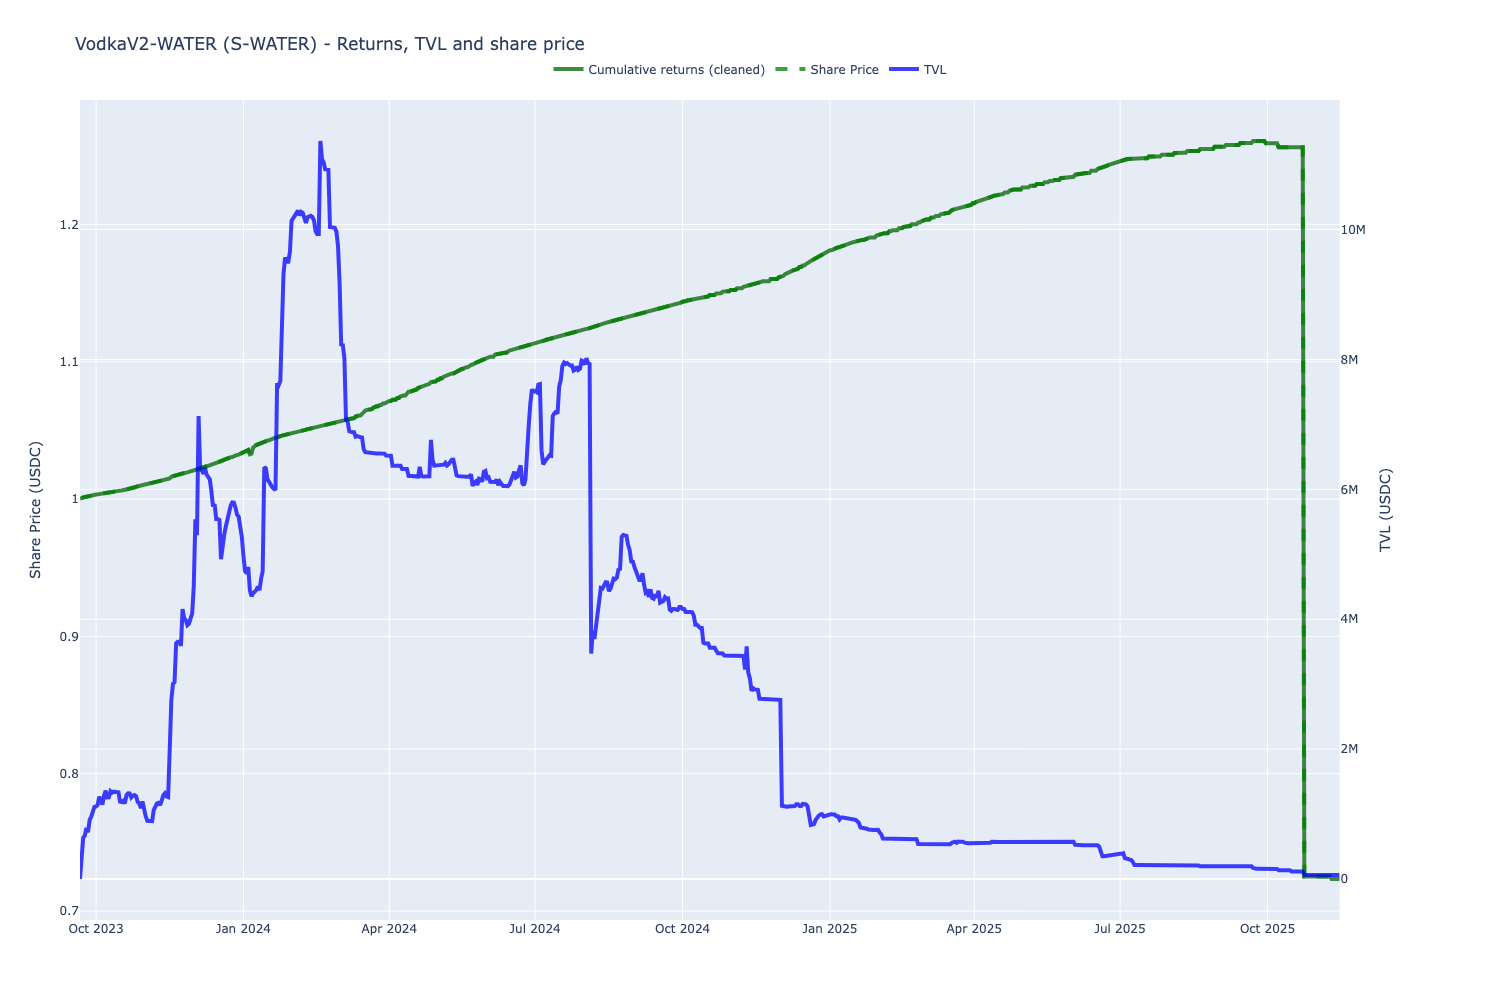

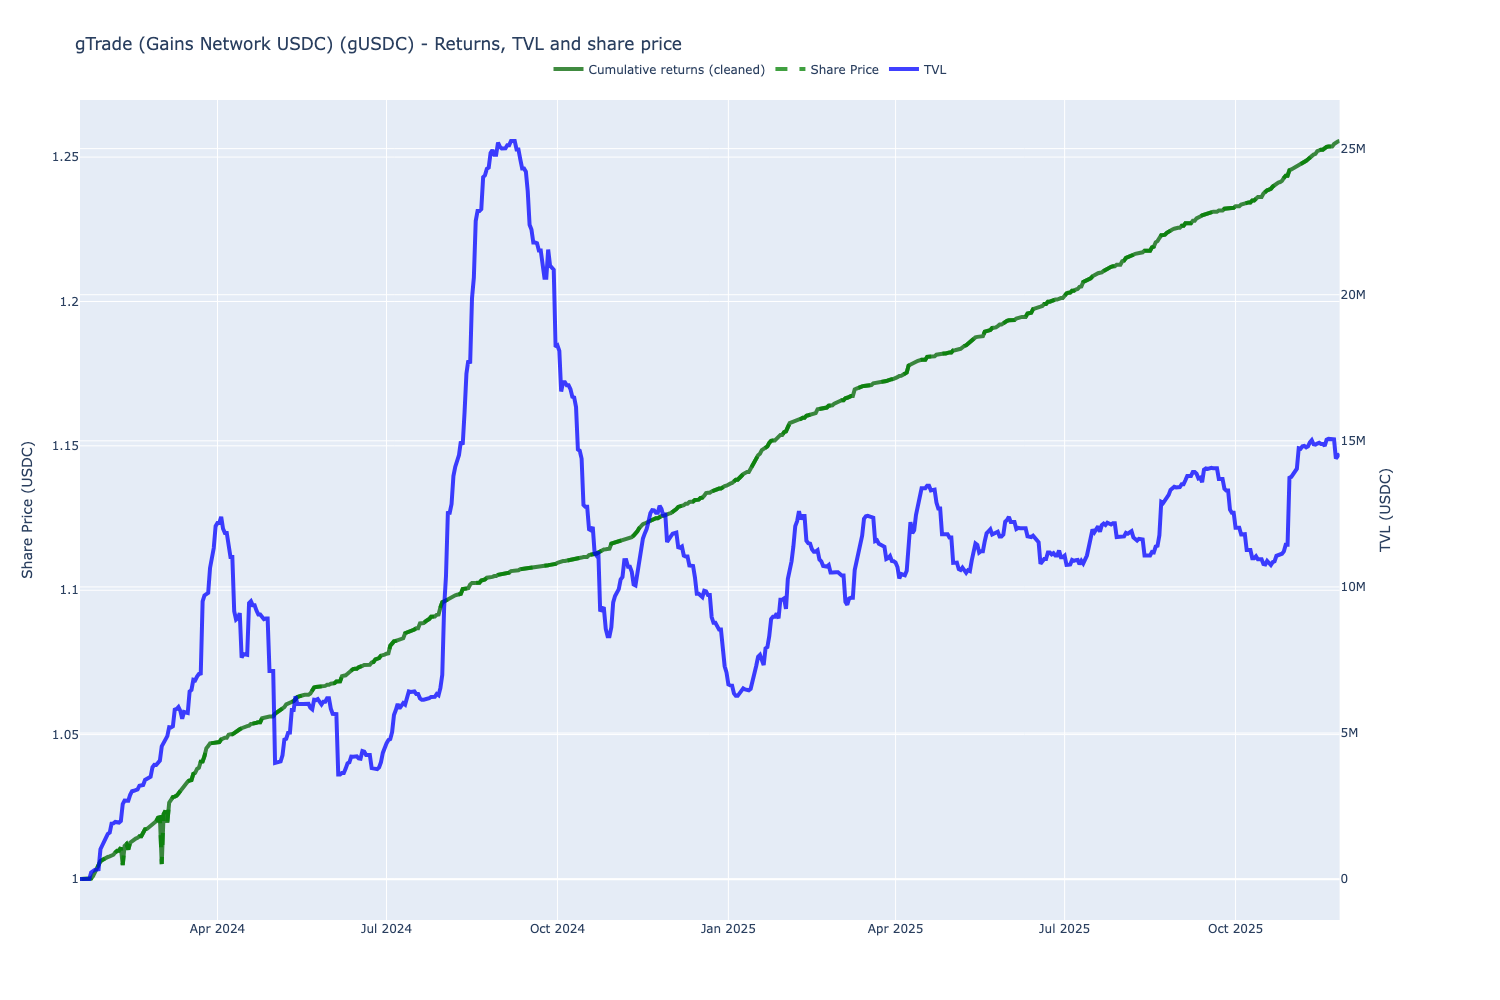

In [38]:
from tradeexecutor.analysis.vault import visualise_vaults

figures = chart_renderer.render(all_vaults_share_price_and_tvl)
for fig in figures:
    fig.show()

# Backtest time range

- Choose the backtesting time range
- Start when we have enough assets (`Parameters.min_asset_universe`) in our asset universe to form the first basket

In [39]:
series = indicator_data.get_indicator_series("all_criteria_included_pair_count")

exceeds_threshold = series > Parameters.min_asset_universe
# Get the first date where the condition is True
backtest_start = Parameters.backtest_start
backtest_end = Parameters.backtest_end

print(f"Time range is {backtest_start} - {backtest_end}")

Time range is 2024-01-01 00:00:00 - 2025-11-15 00:00:00


# Strategy algorithm and backtest

- Run the backtest

In [40]:
from tradeexecutor.backtest.backtest_runner import run_backtest_inline
from tradeexecutor.strategy.alpha_model import AlphaModel
from tradeexecutor.state.trade import TradeExecution
from tradeexecutor.strategy.pandas_trader.strategy_input import StrategyInput, IndicatorDataNotFoundWithinDataTolerance
from tradeexecutor.state.visualisation import PlotKind
from tradeexecutor.backtest.backtest_runner import run_backtest_inline
from tradeexecutor.strategy.tvl_size_risk import USDTVLSizeRiskModel
from tradeexecutor.strategy.weighting import weight_by_1_slash_n, weight_passthrouh, weight_equal
from tradeexecutor.utils.dedent import dedent_any
from tradeexecutor.strategy.pandas_trader.yield_manager import YieldManager, YieldRuleset, YieldWeightingRule, YieldDecisionInput
from tradeexecutor.strategy.execution_context import ExecutionContext, ExecutionMode


_cached_start_times: dict[int, pd.Timestamp] = {}

def create_yield_rules(
    timestamp: pd.Timestamp,
    parameters: StrategyParameters,
    strategy_universe: TradingStrategyUniverse,
) -> YieldRuleset:
    """Create yield rules for the strategy."""
    weights = []
    for vault_spec in VAULTS:
        vault_pair = strategy_universe.get_pair_by_smart_contract(vault_spec[1])
        if vault_pair not in _cached_start_times:
            price_df = strategy_universe.data_universe.candles.get_samples_by_pair(vault_pair.internal_id)
            assert price_df is not None
            index_entry = price_df.index[0]
            assert isinstance(index_entry, tuple)
            _cached_start_times[vault_pair] = index_entry[1]
        
        availability = _cached_start_times[vault_pair]
        if timestamp > availability:
            weights.append(
            YieldWeightingRule(
                pair=vault_pair, 
                max_concentration=1.00,
                max_pool_participation=0.05,
            ),
            )

    if len(weights) == 0:
        return None
    
    return YieldRuleset(
        position_allocation=parameters.allocation,
        buffer_pct=parameters.directional_trade_yield_buffer_pct,
        cash_change_tolerance_usd=parameters.yield_flow_dust_threshold,
        weights=weights
    )


def decide_trades(
    input: StrategyInput
) -> list[TradeExecution]:
    """For each strategy tick, generate the list of trades."""
    parameters = input.parameters
    position_manager = input.get_position_manager()
    state = input.state
    timestamp = input.timestamp
    indicators = input.indicators
    strategy_universe = input.strategy_universe

    portfolio = position_manager.get_current_portfolio()
    equity = portfolio.get_total_equity()
    
    # All gone, stop doing decisions
    if input.execution_context.mode == ExecutionMode.backtesting:
        if equity < parameters.initial_cash * 0.10:
            return []
            
    # Build signals for each pair
    alpha_model = AlphaModel(
        timestamp,
        close_position_weight_epsilon=parameters.min_portfolio_weight,  # 10 BPS is our min portfolio weight
    )

    tvl_included_pair_count = indicators.get_indicator_value(
        "tvl_included_pair_count",
    )

    # Get pairs included in this rebalance cycle.
    # This includes pair that have been pre-cleared in inclusion_criteria()
    # with volume, volatility and TVL filters
    included_pairs = indicators.get_indicator_value(
        "inclusion_criteria",
        na_conversion=False,
    )
    if included_pairs is None:
        included_pairs = []

    # Set signal for each pair
    signal_count = 0
    for pair_id in included_pairs:
        pair = strategy_universe.get_pair_by_id(pair_id)

        if not state.is_good_pair(pair):
            # Tradeable flag set to False, etc.
            continue

        pair_signal = indicators.get_indicator_value("signal", pair=pair)
        if pair_signal is None:
            continue

        weight = pair_signal

        if weight < 0:
            continue

        alpha_model.set_signal(
            pair,
            weight,
        )

        # Diagnostics reporting
        signal_count += 1

    # Calculate how much dollar value we want each individual position to be on this strategy cycle,
    # based on our total available equity
    portfolio = position_manager.get_current_portfolio()
    equity = portfolio.get_total_equity()
    portfolio_target_value = equity * parameters.allocation

    # Select max_assets_in_portfolio assets in which we are going to invest
    # Calculate a weight for ecah asset in the portfolio using 1/N method based on the raw signal
    alpha_model.select_top_signals(count=parameters.max_assets_in_portfolio)
    alpha_model.assign_weights(method=weight_passthrouh)
    # alpha_model.assign_weights(method=weight_by_1_slash_n)

    #
    # Normalise weights and cap the positions
    #
    size_risk_model = USDTVLSizeRiskModel(
        pricing_model=input.pricing_model,
        per_position_cap=parameters.per_position_cap_of_pool,  # This is how much % by all pool TVL we can allocate for a position
        missing_tvl_placeholder_usd=0.0,  # Placeholder for missing TVL data until we get the data off the chain
    )

    alpha_model.normalise_weights(
        investable_equity=portfolio_target_value,
        size_risk_model=size_risk_model,
        max_weight=parameters.max_concentration,
    )

    # Load in old weight for each trading pair signal,
    # so we can calculate the adjustment trade size
    alpha_model.update_old_weights(
        state.portfolio,
        ignore_credit=False,
    )
    alpha_model.calculate_target_positions(position_manager)

    # Shift portfolio from current positions to target positions
    # determined by the alpha signals (momentum)

    # rebalance_threshold_usd = portfolio_target_value * parameters.min_rebalance_trade_threshold_pct
    rebalance_threshold_usd = parameters.individual_rebalance_min_threshold_usd

    assert rebalance_threshold_usd > 0.1, "Safety check tripped - something like wrong with strat code"
    trades = alpha_model.generate_rebalance_trades_and_triggers(
        position_manager,
        min_trade_threshold=rebalance_threshold_usd,  # Don't bother with trades under XXXX USD
        invidiual_rebalance_min_threshold=parameters.individual_rebalance_min_threshold_usd,
        sell_rebalance_min_threshold=parameters.sell_rebalance_min_threshold,
        execution_context=input.execution_context,
    )

    # # Move cash in and out yield managed to cover spot positions
    # yield_result = None 
    # if parameters.use_managed_yield:

    #     rules = create_yield_rules(
    #         timestamp,
    #         parameters, 
    #         strategy_universe,
    #     )

    #     if rules is not None:
    #         yield_manager = YieldManager(
    #             position_manager=position_manager,
    #             rules=rules,
    #         )

    #         yield_input = YieldDecisionInput(
    #             execution_mode=input.execution_context.mode,
    #             cycle=input.cycle,
    #             timestamp=timestamp,
    #             total_equity=state.portfolio.get_total_equity(),
    #             directional_trades=trades,
    #             size_risk_model=size_risk_model,
    #             pending_redemptions=position_manager.get_pending_redemptions(),
    #         )

    #         yield_result = yield_manager.calculate_yield_management(yield_input)
    #         trades += yield_result.trades
        
    # Add verbal report about decision made/not made,
    # so it is much easier to diagnose live trade execution.
    # This will be readable in Discord/Telegram logging.
    if input.is_visualisation_enabled():
        try:
            top_signal = next(iter(alpha_model.get_signals_sorted_by_weight()))
            if top_signal.normalised_weight == 0:
                top_signal = None
        except StopIteration:
            top_signal = None

        rebalance_volume = sum(t.get_value() for t in trades)

        report = dedent_any(f"""
        Cycle: #{input.cycle}
        Rebalanced: {'👍' if alpha_model.is_rebalance_triggered() else '👎'}
        Open/about to open positions: {len(state.portfolio.open_positions)} 
        Max position value change: {alpha_model.max_position_adjust_usd:,.2f} USD
        Rebalance threshold: {alpha_model.position_adjust_threshold_usd:,.2f} USD
        Trades decided: {len(trades)}
        Pairs total: {strategy_universe.data_universe.pairs.get_count()}
        Pairs meeting inclusion criteria: {len(included_pairs)}
        Pairs meeting TVL inclusion criteria: {tvl_included_pair_count}        
        Signals created: {signal_count}
        Total equity: {portfolio.get_total_equity():,.2f} USD
        Cash: {position_manager.get_current_cash():,.2f} USD
        Investable equity: {alpha_model.investable_equity:,.2f} USD
        Accepted investable equity: {alpha_model.accepted_investable_equity:,.2f} USD
        Allocated to signals: {alpha_model.get_allocated_value():,.2f} USD
        Discarted allocation because of lack of lit liquidity: {alpha_model.size_risk_discarded_value:,.2f} USD
        Rebalance volume: {rebalance_volume:,.2f} USD
        """)

        # Most volatility pair signal weight (normalised): {max_vol_signal.normalised_weight * 100 if max_vol_signal else '-'} % (got {max_vol_signal.position_size_risk.get_relative_capped_amount() * 100 if max_vol_signal else '-'} % of asked size)
        if top_signal:
            assert top_signal.position_size_risk
            report += dedent_any(f"""
            Top signal pair: {top_signal.pair.get_ticker()}
            Top signal value: {top_signal.signal}
            Top signal weight: {top_signal.raw_weight}
            Top signal weight (normalised): {top_signal.normalised_weight * 100:.2f} % (got {top_signal.position_size_risk.get_relative_capped_amount() * 100:.2f} % of asked size)
            """)

        for flag, count in alpha_model.get_flag_diagnostics_data().items():
            report += f"Signals with flag {flag.name}: {count}\n"

        state.visualisation.add_message(
            timestamp,
            report,
        )

        state.visualisation.set_discardable_data("alpha_model", alpha_model)

    return trades  # Return the list of trades we made in this cycle


result = run_backtest_inline(
    name=parameters.id,
    engine_version="0.5",
    decide_trades=decide_trades,
    create_indicators=indicators.create_indicators,
    client=client,
    universe=strategy_universe,
    parameters=parameters,
    # log_level=logging.INFO,
    max_workers=1,
    start_at=backtest_start,
    end_at=backtest_end,
)

state = result.state

trade_count = len(list(state.portfolio.get_all_trades()))
print(f"Backtesting completed, backtested strategy made {trade_count} trades")

# Add state to the further charts
chart_renderer = ChartBacktestRenderingSetup(
    registry=charts,
    strategy_input_indicators=indicator_data,
    state=state,
)


Reading cached indicators rolling_returns, tvl, tvl_inclusion_criteria, trading_availability_criteria, inclusi…

Using indicator cache /Users/moo/.cache/indicators/arbitrum_1d_56_2023-09-21-2025-11-26_ff


  0%|          | 0/59097600 [00:00<?, ?it/s]

Backtesting completed, backtested strategy made 308 trades


# Performance metrics

- Display portfolio performance metrics
- Compare against buy and hold matic using the same initial capital

**Note**: Some of these metrics might be incorrect due to slow start of the strategy

In [41]:
from tradeexecutor.analysis.multi_asset_benchmark import compare_strategy_backtest_to_multiple_assets

df = chart_renderer.render(performance_metrics)
display(df)

Strategy                  ETH
Start Period                        2024-01-01           2024-01-01
End Period                          2025-11-10           2025-11-10
Risk-Free Rate                            0.0%                 0.0%
Time in Market                           15.0%                99.0%
Cumulative Return                       12.92%               60.59%
CAGR﹪                                    4.61%               19.22%
Sharpe                                    5.26                 0.71
Prob. Sharpe Ratio                      100.0%               83.57%
Smart Sharpe                              4.88                 0.66
Sortino                                1370.88                 1.09
Smart Sortino                          1271.41                 1.01
Sortino/√2                              969.36                 0.77
Smart Sortino/√2                        899.02                 0.71
Omega                                  1872.14              1872.14
Max Drawdown                            -0.01%               -63.8%
Longest DD Days                              7                  515
Volatility (ann.)                        1.24%               70.76%
Calmar                                  709.45                  0.3
Skew                                      7.84                 0.63
Kurtosis                                 89.04                 4.27
Expected Daily                           0.02%                0.07%
Expected Monthly                         0.53%                2.08%
Expected Yearly                          6.26%               26.72%
Kelly Criterion                         98.92%                    -
Risk of Ruin                              0.0%                 0.0%
Daily Value-at-Risk                     -0.09%               -5.95%
Expected Shortfall (cVaR)               -0.09%               -5.95%
Max Consecutive Wins                         1                    9
Max Consecutive Losses                       1                    7
Gain/Pain Ratio                        1871.14                 0.11
Gain/Pain (1M)                               -                  0.7
Payoff Ratio                              19.5                    -
Profit Factor                          1872.14                 1.11
Common Sense Ratio                           -                 1.24
CPC Index                             36133.17                    -
Tail Ratio                                   -                 1.12
Outlier Win Ratio                         14.2                 2.23
Outlier Loss Ratio                        -0.0                 1.74
MTD                                      0.36%                -7.3%
3M                                       2.39%              -16.32%
6M                                       4.54%               52.13%
YTD                                       6.3%                7.07%
1Y                                       6.99%               14.04%
3Y (ann.)                                4.61%               19.22%
5Y (ann.)                                4.61%               19.22%
10Y (ann.)                               4.61%               19.22%
All-time (ann.)                          4.61%               19.22%
Best Day                                 0.96%               21.79%
Worst Day                               -0.01%              -14.75%
Best Month                               1.13%                48.7%
Worst Month                              0.26%               -32.2%
Best Year                                 6.3%               49.99%
Worst Year                               6.23%                7.07%
Avg. Drawdown                           -0.01%              -11.31%
Avg. Drawdown Days                           7                   54
Recovery Factor                        1871.14                 1.46
Ulcer Index                                0.0                 0.29
Serenity Index                      1043222.03                 0.24
Avg. Up Month             

# Equity curve

- Equity curve shows how your strategy accrues value over time

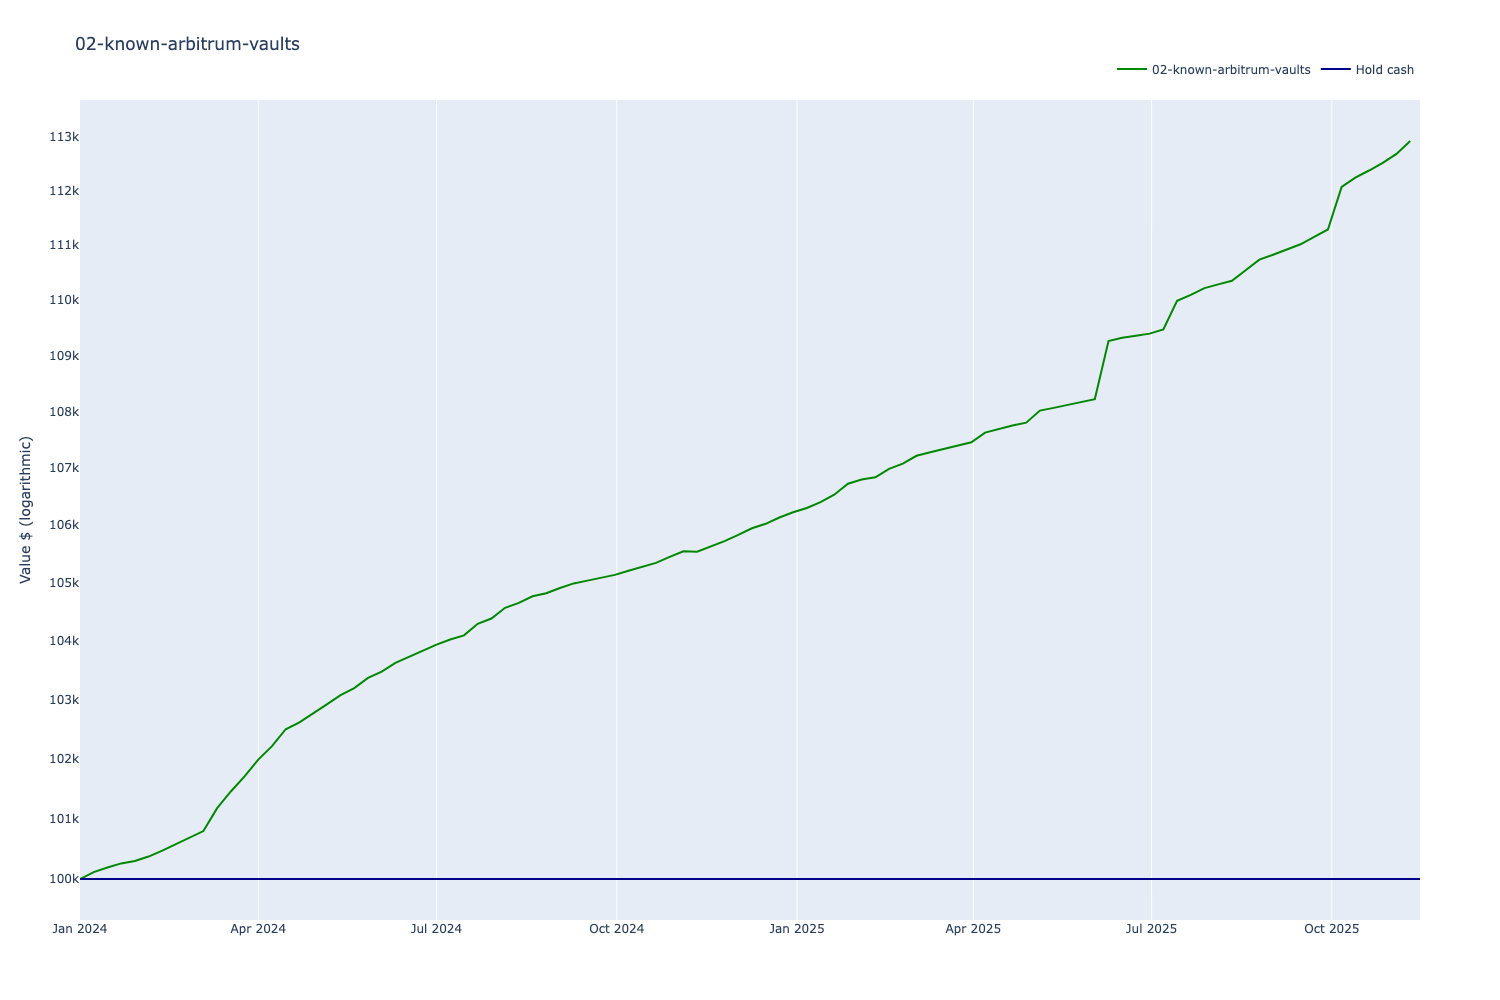

In [42]:
fig = chart_renderer.render(
    equity_curve_with_benchmark, 
)

fig.show()

## Equity curve with drawdown

- Linear curve

In [43]:

fig = chart_renderer.render(equity_curve_with_drawdown)

# Asset weights

- What assets were allocated over time
- Do both proportional % and USD weights

## Volatiles only

In [44]:
# fig = chart_renderer.render(volatile_weights_by_percent)
# fig.show()

print("Currently the strategy does not take directional positions")

Currently the strategy does not take directional positions


## Volatiles and non-volatiles

- Portfolio with cash, lending and vault positions

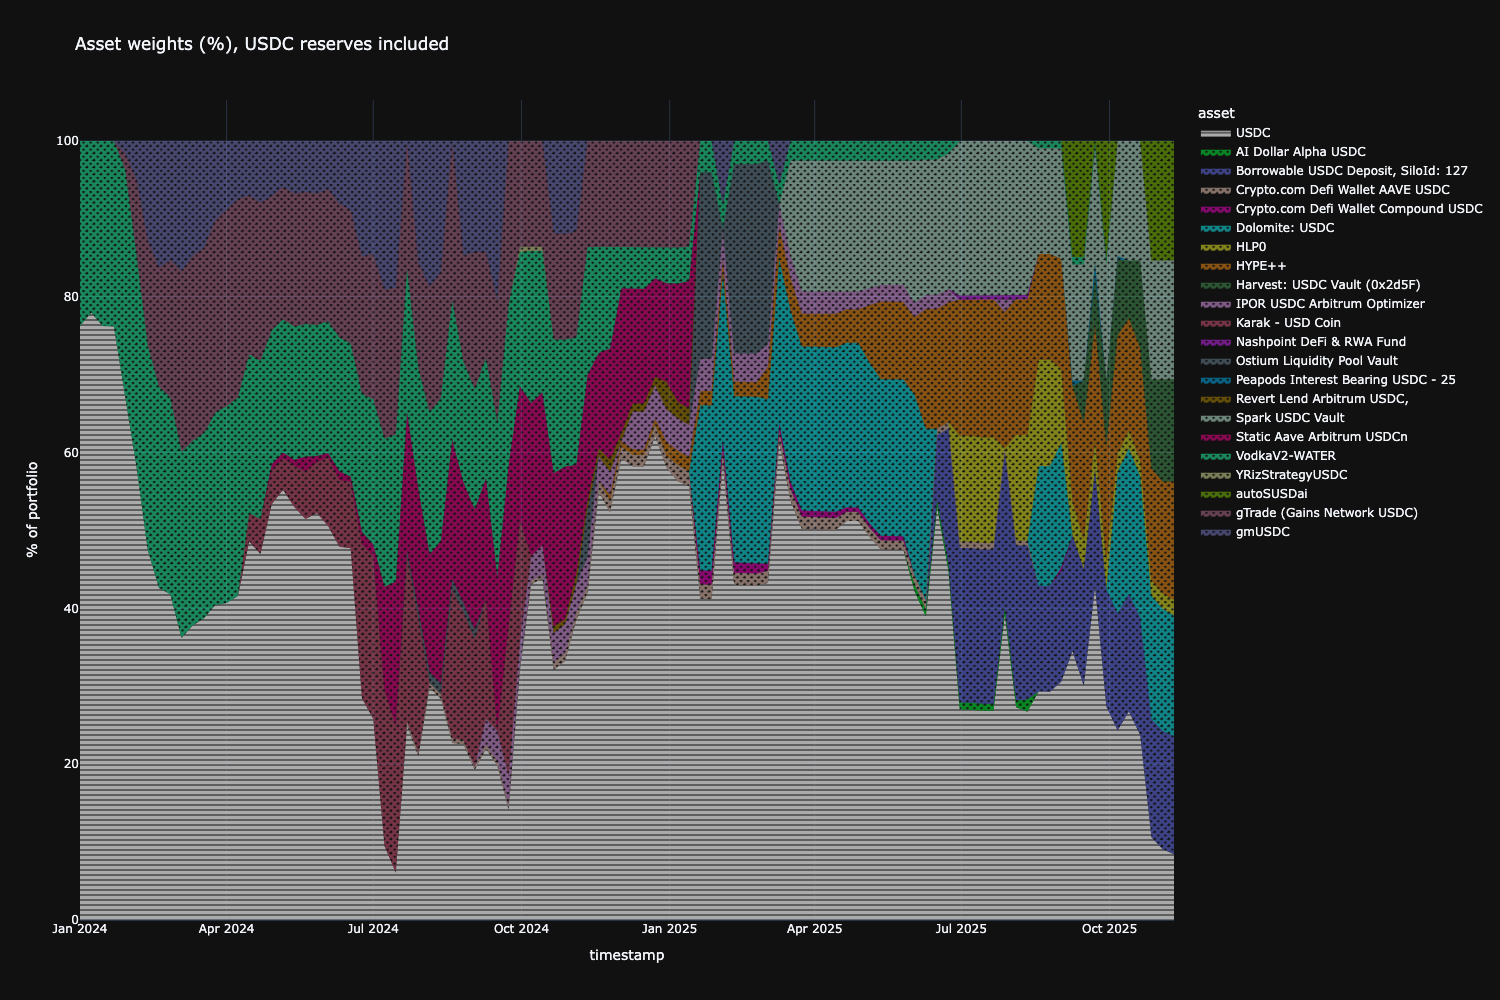

In [45]:

fig = chart_renderer.render(volatile_and_non_volatile_percent)
fig.show()
    

## Portfolio equity curve breakdown by asset

- Where did we make the profit

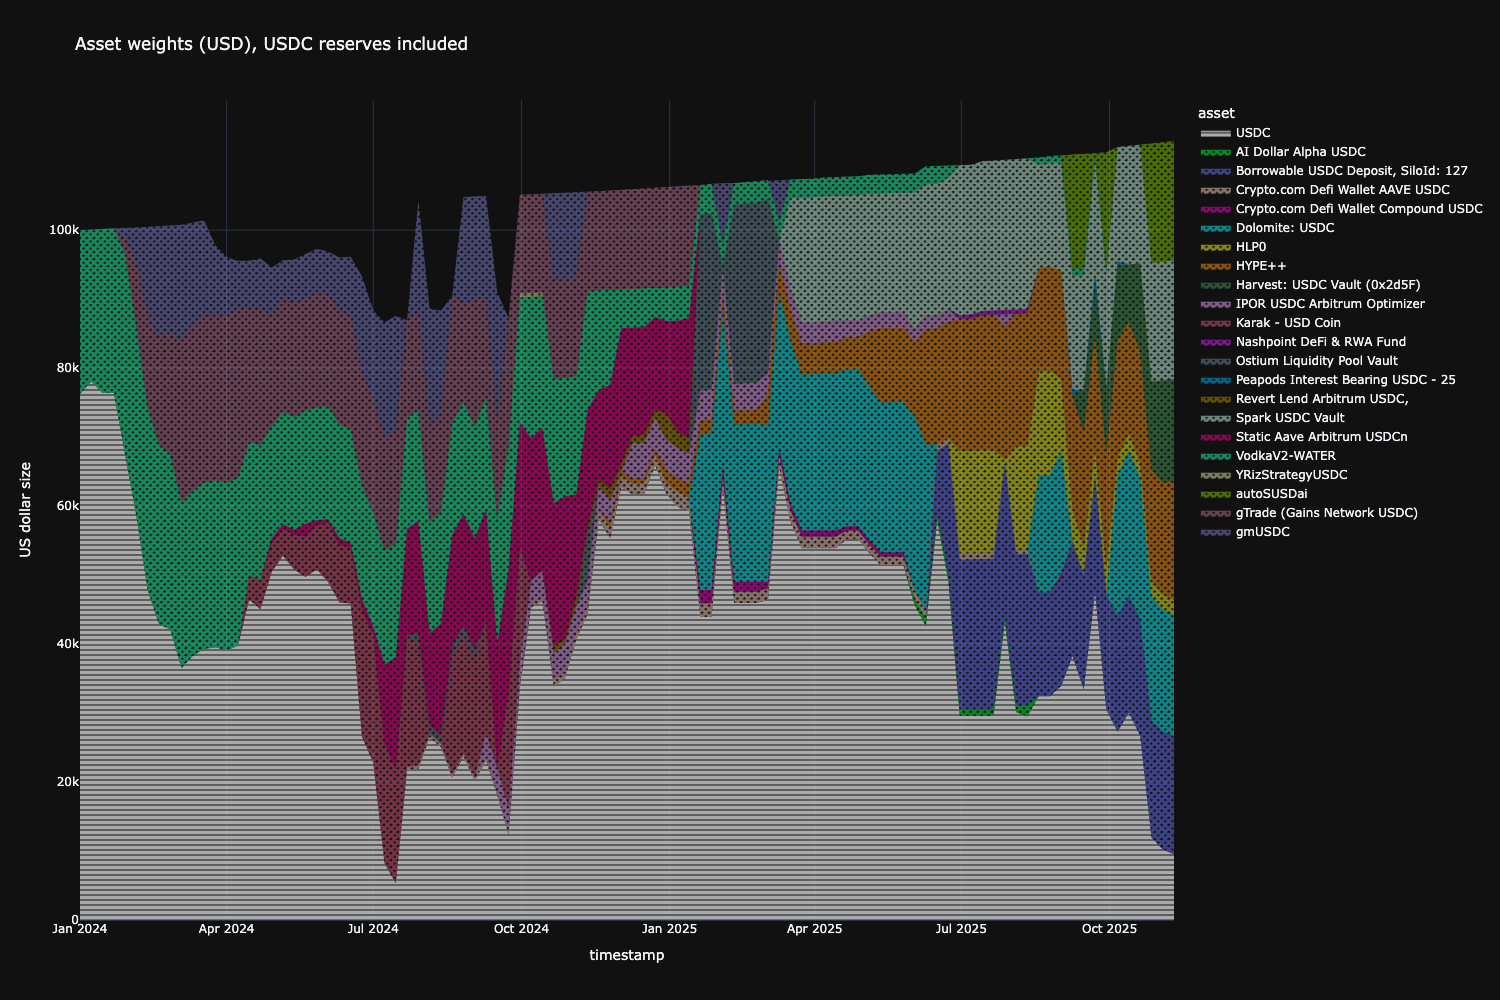

In [46]:
fig = chart_renderer.render(equity_curve_by_asset)
fig.show()

## Weight allocation statistics



In [47]:
stats = chart_renderer.render(weight_allocation_statistics)
display(stats)


At  \
Name                                                  
Max position (excluding USDC)   2024-01-29 00:00:00   
Min position (excluding USDC)   2025-10-06 00:00:00   
Mean position (excluding USDC)                        
Max position (excluding USDC)   2024-01-01 00:00:00   
Min position (excluding USDC)   2025-10-06 00:00:00   
Mean position (excluding USDC)                        
Max position (including USDC)   2024-01-08 00:00:00   
Min position (including USDC)   2025-10-06 00:00:00   
Mean position (including USDC)                        

                                                              Pair      Value  \
Name                                                                            
Max position (excluding USDC)                        VodkaV2-WATER  29,263.91   
Min position (excluding USDC)   Peapods Interest Bearing USDC - 25     506.25   
Mean position (excluding USDC)                                      10,445.18   
Max position (excluding USDC)                        VodkaV2-WATER     100.00   
Min position (excluding USDC)   Peapods Interest Bearing USDC - 25       0.60   
Mean position (excluding USDC)                                          17.07   
Max position (including USDC)                                 USDC      77.97   
Min position (including USDC)   Peapods Interest Bearing USDC - 25       0.45   
Mean position (including USDC)                                          14.58   

                               Unit  
Name                                 
Max position (excluding USDC)   USD  
Min position (excluding USDC)   USD  
Mean position (excluding USDC)  USD  
Max position (excluding USDC)     %  
Min position (excluding USDC)     %  
Mean position (excluding USDC)    %  
Max position (including USDC)     %  
Min position (including USDC)     %  
Mean position (including USDC)    %

# Positions at the end

Some example positions at the end


In [48]:
stats = chart_renderer.render(positions_at_end)
display(stats)

token         value
position_id                          
18               HYPE++  17197.960025
26                sUSDC  17229.625343
28            bUSDC-127  17123.305200
32                 HLP0   2221.767445
38                fUSDC  14783.125314
42                dUSDC  17542.936412
43           autoSUSDai  17296.614218

# Strategy thinking

- At the end of strategy
- Reverse order - last timestamp first

In [49]:
df = chart_renderer.render(last_messages)
display(df)

# Alpha model diagnostics data

- Dump out alpha model contents from the last cycle

In [50]:
df = chart_renderer.render(alpha_model_diagnostics)
display(df)

Signal    Asked size  Accepted size  Value adjust USD  \
Pair                                                                            
pfUSDC-6-USDC         0.377895             -            NaN          0.000000   
aAutopilot_USDC-USDC  0.411798             -            NaN          0.000000   
S-WATER-USDC          0.575168             -            NaN          0.000000   
oLP-USDC              0.937850             -            NaN          0.000000   
KITSUNE-USDC          0.947117             -            NaN          0.000000   
pfUSDC-25-USDC        0.999492             -            NaN          0.000000   
fUSDC-USDC            1.000000             -            NaN          0.000000   
fUSDC-USDC            1.000000             -            NaN          0.000000   
gUSDC-USDC            1.000000             -            NaN          0.000000   
gmUSDC-USDC           1.000000             -            NaN          0.000000   
gmUSDC-USDC           1.000000             -            NaN          0.000000   
gtUSDCc-USDC          1.000000             -            NaN          0.000000   
gtUSDCp-USDC          1.000000             -            NaN          0.000000   
hyperUSDC-USDC        1.000000             -            NaN          0.000000   
ipUSDCfusion-USDC     1.000000             -            NaN          0.000000   
AIDaUSDC-USDC         1.000000             -            NaN          0.000000   
plvHedge-USDC         1.000000             -            NaN          0.000000   
rlArbUSDC-USDC        1.000000             -            NaN          0.000000   
sUSDC-USDC            1.000000  17197.960025   17197.960025        -31.665319   
sUSDC_AaveOpt-USDC    1.000000             -            NaN          0.000000   
soUSDC-USDC           1.000000             -            NaN          0.000000   
stataArbUSDCn-USDC    1.000000             -            NaN          0.000000   
steakUSDC-USDC        1.000000             -            NaN          0.000000   
waArbUSDCn-USDC       1.000000             -            NaN          0.000000   
yDG-USDC-USDC         1.000000             -            NaN          0.000000   
fUSDC-USDC            1.000000             -            NaN          0.000000   
fUSDC-USDC            1.000000  17197.960025   14783.125314          0.000000   
dUSDC-USDC            1.000000  17542.936412   17542.936412       -141.356526   
ycUSDC-USDC           1.000000             -            NaN          0.000000   
CSHYUSDC-USDC         1.000000             -            NaN          0.000000   
CSUSDC-USDC           1.000000             -            NaN          0.000000   
HLP0-USDC             1.000000  15325.177869    2215.702780         -6.064666   
HYPE++-USDC           1.000000  17197.960025   17197.960025        842.375108   
KUSDC-USDC            1.000000             -            NaN          0.000000   
LVUSDC-USDC           1.000000             -            NaN          0.000000   
MCUSDC-USDC           1.000000             -            NaN          0.000000   
RWAFI-USDC            1.000000             -            NaN          0.000000   
TIDARBUSD-USDC        1.000000             -            NaN          0.000000   
USDC-USDC             1.000000             -            NaN          0.000000   
eeUSDC-USDC           1.000000             -            NaN          0.000000   
USDn2-USDC            1.000000             -            NaN          0.000000   
autoUSDai-USDC        1.000000             -            NaN          0.000000   
bUSDC-127-USDC        1.000000  17197.960025   17197.960025         74.654824   
bUSDC-145-USDC        1.000000             -            NaN          0.000000   
bUSDC-146-USDC        1.000000             -            NaN          0.000000   
bbqUSDC-USDC          1.000000             -            NaN          0.000000   
cdwAaveUSDC-USDC      1.000000             -            NaN          0.000000   
cdwCompUSDC-USDC      1.000000             -           

# Trading pair breakdown

- Trade success for each trading pair



In [51]:
df = chart_renderer.render(trading_pair_breakdown)
display(df)

# Trading metrics

- Trading cost, etc.

In [52]:
df = chart_renderer.render(trading_metrics)
display(df)


# Interest accrued

- How much profit our non-volatile positions generated

## Lending pools

- Calculate interest from lending pools (Aave, etc)

In [53]:
df = chart_renderer.render(lending_pool_interest_accrued)
display(df)

Metric  Value
0  Credit position count      0

# Vault performance

- Analyse the performance of our vaults

## Vault statistics 

- Calculate interest accrued on different vaults for the strategy

In [54]:
df = chart_renderer.render(vault_statistics)
display(df)

Metric                     Value
0                Position count                        43
1         Total interest earned             12,922.36 USD
2                  Avg interest                     3.42%
3                  Min interest                   -36.25%
4                  Max interest                    27.68%
5  Avg credit position duration  96 days, 20:39:04.186047
6         Total deposit flow in            600,849.01 USD
7                   Min deposit                502.35 USD
8                   Avg deposit              4,385.76 USD
9                   Max deposit             25,945.35 USD

## Vault position list

- Display individual positions taken in the vaults

In [55]:
df = chart_renderer.render(all_vault_positions)
display(df)

Vault     Opened               Closed  \
Id                                                                         
1                          VodkaV2-WATER 2024-01-01  2025-06-30 00:00:00   
2            gTrade (Gains Network USDC) 2024-01-29  2025-01-20 00:00:00   
3                                 gmUSDC 2024-01-29  2024-09-30 00:00:00   
4                                 gmUSDC 2024-03-25  2024-07-22 00:00:00   
5                       Karak - USD Coin 2024-04-15  2024-08-05 00:00:00   
6             Static Aave Arbitrum USDCn 2024-04-29  2025-01-20 00:00:00   
8            Ostium Liquidity Pool Vault 2024-07-22  2024-09-09 00:00:00   
7       Crypto.com Defi Wallet AAVE USDC 2024-07-22  2025-08-18 00:00:00   
9                                 gmUSDC 2024-08-05  2024-08-19 00:00:00   
10                      Karak - USD Coin 2024-08-19  2024-09-16 00:00:00   
11          IPOR USDC Arbitrum Optimizer 2024-09-09  2024-12-02 00:00:00   
12                                gmUSDC 2024-09-16  2024-09-23 00:00:00   
13                      Karak - USD Coin 2024-09-23  2024-10-07 00:00:00   
14                      YRizStrategyUSDC 2024-09-30  2024-10-21 00:00:00   
15            Revert Lend Arbitrum USDC, 2024-10-21  2025-01-20 00:00:00   
16                                gmUSDC 2024-10-21  2024-11-11 00:00:00   
17           Ostium Liquidity Pool Vault 2024-11-11  2024-11-18 00:00:00   
18                                HYPE++ 2024-11-25                    -   
19          IPOR USDC Arbitrum Optimizer 2024-12-09  2025-06-30 00:00:00   
22           Ostium Liquidity Pool Vault 2025-01-20  2025-02-03 00:00:00   
21  Crypto.com Defi Wallet Compound USDC 2025-01-20  2025-06-02 00:00:00   
20                        Dolomite: USDC 2025-01-20  2025-06-16 00:00:00   
23                                gmUSDC 2025-02-03  2025-02-10 00:00:00   
24           Ostium Liquidity Pool Vault 2025-02-10  2025-03-10 00:00:00   
25                                gmUSDC 2025-03-10  2025-03-17 00:00:00   
26                      Spark USDC Vault 2025-03-17                    -   
27                  AI Dollar Alpha USDC 2025-06-02  2025-08-18 00:00:00   
28  Borrowable USDC Deposit, SiloId: 127 2025-06-16                    -   
30             Nashpoint DeFi & RWA Fund 2025-06-30  2025-08-18 00:00:00   
29                                  HLP0 2025-06-30  2025-07-28 00:00:00   
31          IPOR USDC Arbitrum Optimizer 2025-07-28  2025-08-04 00:00:00   
32                                  HLP0 2025-08-04                    -   
33                         VodkaV2-WATER 2025-08-18  2025-10-06 00:00:00   
34                        Dolomite: USDC 2025-08-18  2025-09-08 00:00:00   
35  Crypto.com Defi Wallet Compound USDC 2025-09-01  2025-09-08 00:00:00   
37    Peapods Interest Bearing USDC - 25 2025-09-08  2025-09-15 00:00:00   
36                            autoSUSDai 2025-09-08  2025-09-22 00:00:00   
38          Harvest: USDC Vault (0x2d5F) 2025-09-15                    -   
39    Peapods Interest Bearing USDC - 25 2025-09-22  2025-09-29 00:00:00   
40                            autoSUSDai 2025-09-29  2025-10-06 00:00:00   
42                        Dolomite: USDC 2025-10-06                    -   
41    Peapods Interest Bearing USDC - 25 2025-10-06  2025-10-13 00:00:00   
43                            autoSUSDai 2025-10-27                    -   

   Profit % annualised Profit USD Price on open Price on close Price diff %  \
Id                                                                            
1                 4.76    2565.58          1.03           1.25        20.54   
2                 6.39    2252.60          1.01           1.15        14.21   
3                 3.68     834.70          1.00           1.09         9.09   
4                 4.68     304.16          1.00           1.05         4.63   
5                 0.00       0.00          1.00           1.00            -   
6                 2.07     584.11          1.06           1.1

## Vault individual position timeline

- Show one of the vaults

/Users/moo/code/trade-executor/tradeexecutor/strategy/chart/standard/vault.py:89: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



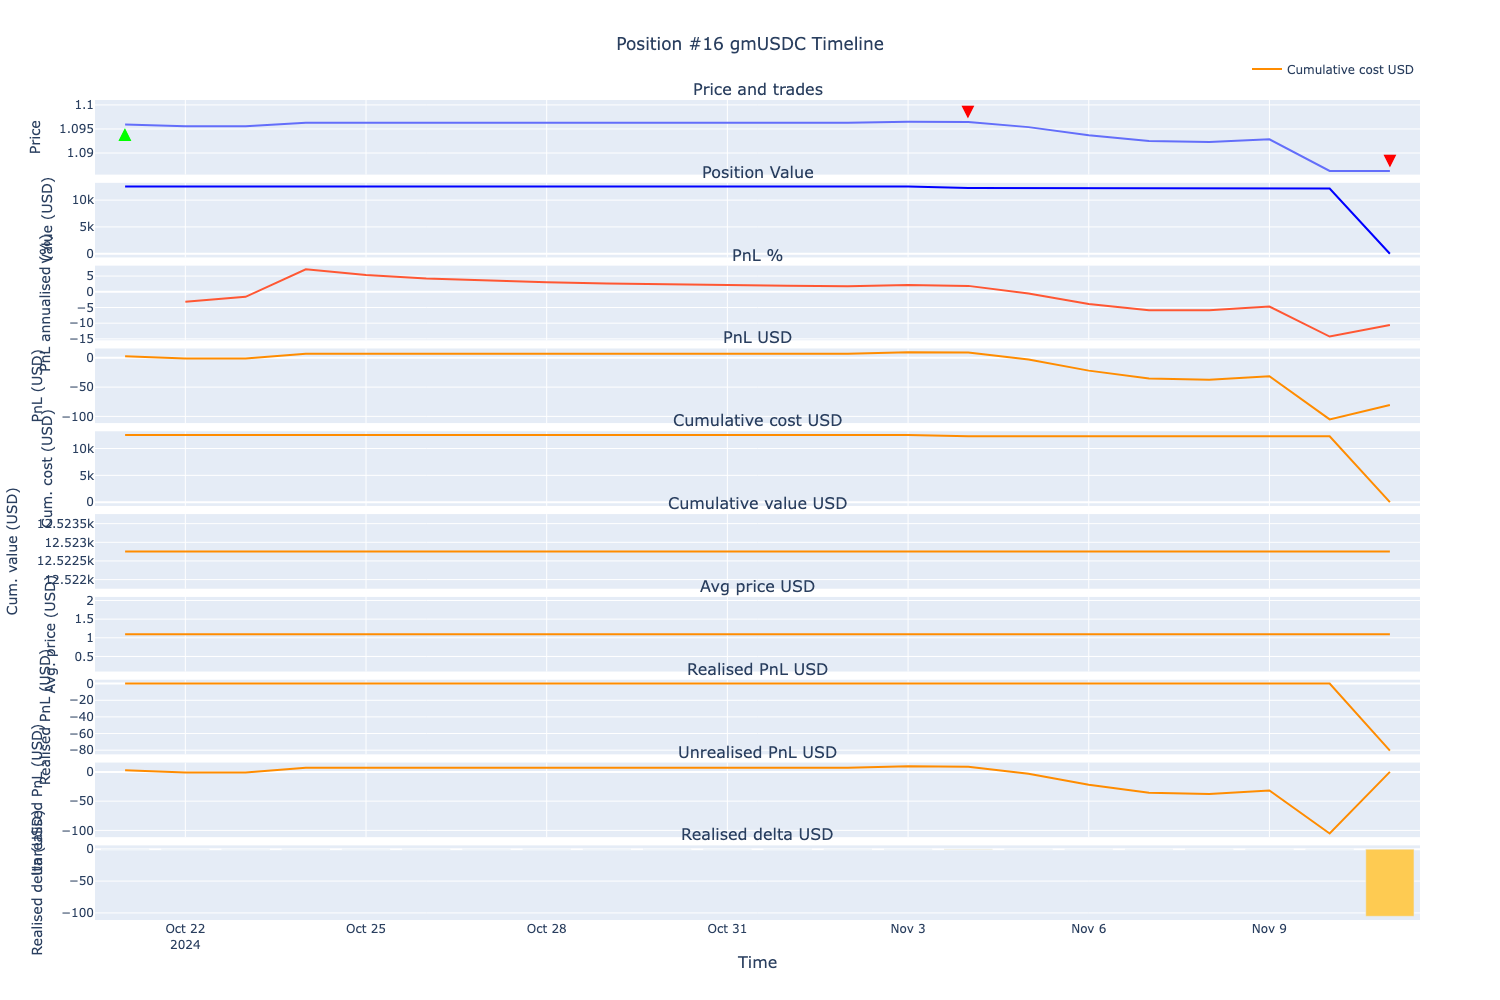

quantity         delta  executed_price  fee  cumulative_cost  \
timestamp                                                                      
2024-10-21  11429.303045  11429.303045        1.095671  0.0     1.252276e+04   
2024-10-22  11429.303045      0.000000        1.095671  0.0     1.252276e+04   
2024-11-03  11429.303045      0.000000        1.095671  0.0     1.252276e+04   
2024-11-04  11201.232749   -228.070296        1.096470  0.0     1.227287e+04   
2024-11-05  11201.232749      0.000000        1.096470  0.0     1.227287e+04   
2024-11-10  11201.232749      0.000000        1.096470  0.0     1.227287e+04   
2024-11-11      0.000000 -11201.232749        1.088463  0.0    -1.818989e-12   

            cumulative_value  avg_price  mark_price         value  \
timestamp                                                           
2024-10-21      12522.755896   1.095671    1.095906  12525.441783   
2024-10-22      12522.755896   1.095671    1.095574  12521.647254   
2024-11-03      12522.755896   1.095671    1.096509  12532.333652   
2024-11-04      12522.755896   1.095671    1.096450  12281.591648   
2024-11-05      12522.755896   1.095671    1.095385  12269.662335   
2024-11-10      12522.755896   1.095671    1.086278  12167.652708   
2024-11-11      12522.755896   1.095671    1.086278      0.000000   

            realised_delta  realised_pnl  unrealised_pnl  realised_pnl_pct  \
timestamp                                                                    
2024-10-21        0.000000      0.000000        2.685886          0.000000   
2024-10-22        0.000000      0.000000       -1.108642          0.000000   
2024-11-03        0.000000      0.000000        9.577756          0.000000   
2024-11-04        0.177667      0.182228        8.725760          0.000729   
2024-11-05        0.000000      0.182228       -3.203553          0.000729   
2024-11-10        0.000000      0.182228     -105.213179          0.000729   
2024-11-11     -105.213179    -80.556257        0.000000         -0.006433   

            unrealised_pnl_pct  total_pnl_pct   pnl_pct         pnl duration  \
timestamp                                                                      
2024-10-21            0.000214       0.000214  0.000214    2.685886   0 days   
2024-10-22           -0.000089      -0.000089 -0.000089   -1.108642   1 days   
2024-11-03            0.000765       0.000765  0.000765    9.577756  13 days   
2024-11-04            0.000711       0.000711  0.000711    8.907988  14 days   
2024-11-05           -0.000261      -0.000241 -0.000241   -3.021324  15 days   
2024-11-10           -0.008573      -0.008387 -0.008387 -105.030951  20 days   
2024-11-11            0.000000      -0.006433 -0.006433  -80.556257  21 days   

            annual_periods  pnl_annualised  
timestamp                                   
2024-10-21             inf             inf  
2024-10-22      365.000000       -0.031798  
2024-11-03       28.076923        0.021698  
2024-11-04       26.071429        0.018712  
2024-11-05       24.333333       -0.005854  
2024-11-10       18.250000       -0.142481  
2024-11-11       17.380952       -0.106107

In [56]:
pair = strategy_universe.get_pair_by_smart_contract(address=VAULTS[0][1])

chart_renderer = ChartBacktestRenderingSetup(
    registry=charts,
    strategy_input_indicators=indicator_data,
    pairs=[pair],
    state=state,
)

fig, df = chart_renderer.render(vault_position_timeline)

display(fig)
display(df)